In [127]:
import pandas as pd
import numpy as np
from scipy import stats
from tqdm import tqdm

In [128]:
data = pd.read_csv("PerfectData.csv")

In [129]:
data

,Site,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,GRADE,AGE,SEX,CANCERCAREPLANINTENT,...,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION,ADMINISTRATION_ROUTE,DRUG_GROUP
0,C34,8140.0,MALIGNANT,4,2.0,1b,GX,59,FEMALE,No active treatment,...,CARBOPLATIN + ETOPOSIDE,Not Taking Part,NO,YES,NO,0.0,1,200.0,1,ETOPOSIDE
1,C34,8140.0,MALIGNANT,4,2.0,1b,GX,59,FEMALE,No active treatment,...,CARBOPLATIN + ETOPOSIDE,Not Taking Part,NO,YES,NO,0.0,1,10.0,2,NOT CHEMO
2,C34,8140.0,MALIGNANT,2a,0.0,0,G3,54,MALE,Curative,...,Carboplatin + Etoposide iv&po,Not Taking Part,NO,NO,NO,0.0,1,130.0,1,ETOPOSIDE
3,C34,8140.0,MALIGNANT,2a,0.0,0,G3,54,MALE,Curative,...,Carboplatin + Etoposide iv&po,Not Taking Part,NO,NO,NO,0.0,1,210.0,1,ETOPOSIDE
4,C34,8140.0,MALIGNANT,2a,0.0,0,G3,54,MALE,Curative,...,Carboplatin + Etoposide iv&po,Not Taking Part,NO,NO,NO,0.0,2,10.0,2,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,C34,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,...,ECX,Not Taking Part,NO,NO,NO,0.0,4,240.0,1,STEROID
946,C34,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,...,ECX,Not Taking Part,NO,NO,NO,0.0,4,8.0,1,STEROID
947,C34,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,...,ECX,Not Taking Part,NO,NO,NO,0.0,4,120.0,1,DOCETAXEL
948,C34,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,...,ECX,Not Taking Part,NO,NO,NO,0.0,3,950.0,1,CARBOPLATIN


In [130]:
data.dtypes

Site                               object
MORPH_ICD10_O2                    float64
BEHAVIOUR_ICD10_O2                 object
T_BEST                             object
N_BEST                            float64
M_BEST                             object
GRADE                              object
AGE                                 int64
SEX                                object
CANCERCAREPLANINTENT               object
CNS                                object
ACE27                               int64
NEWVITALSTATUS                     object
HEIGHT_AT_START_OF_REGIMEN        float64
WEIGHT_AT_START_OF_REGIMEN        float64
MAPPED_REGIMEN                     object
CLINICAL_TRIAL                     object
CHEMO_RADIATION                    object
REGIMEN_MOD_TIME_DELAY             object
REGIMEN_MOD_STOPPED_EARLY          object
REGIMEN_OUTCOME_SUMMARY           float64
CYCLE_NUMBER                        int64
ACTUAL_DOSE_PER_ADMINISTRATION    float64
ADMINISTRATION_ROUTE              

In [131]:
data.dtypes

Site                               object
MORPH_ICD10_O2                    float64
BEHAVIOUR_ICD10_O2                 object
T_BEST                             object
N_BEST                            float64
M_BEST                             object
GRADE                              object
AGE                                 int64
SEX                                object
CANCERCAREPLANINTENT               object
CNS                                object
ACE27                               int64
NEWVITALSTATUS                     object
HEIGHT_AT_START_OF_REGIMEN        float64
WEIGHT_AT_START_OF_REGIMEN        float64
MAPPED_REGIMEN                     object
CLINICAL_TRIAL                     object
CHEMO_RADIATION                    object
REGIMEN_MOD_TIME_DELAY             object
REGIMEN_MOD_STOPPED_EARLY          object
REGIMEN_OUTCOME_SUMMARY           float64
CYCLE_NUMBER                        int64
ACTUAL_DOSE_PER_ADMINISTRATION    float64
ADMINISTRATION_ROUTE              

In [132]:
data= data.rename(columns={"MORPH_ICD10_O2":"Morph","BEHAVIOUR_ICD10_O2":"Behaviour","T_BEST": "T Best",
                          "N_BEST" : "N Best", "M_BEST" : "M Best", "GRADE" : "Grade", "AGE" : "Age",
                          "SEX":"Sex","CANCERCAREPLANINTENT":"Cancer Plan", "NEWVITALSTATUS" : "Vital Status",
                          "HEIGHT_AT_START_OF_REGIMEN":"Height","WEIGHT_AT_START_OF_REGIMEN":"Weight","MAPPED_REGIMEN":"Regimen","CLINICAL_TRIAL":"Clinical Trial",
                          "CHEMO_RADIATION":"Chemo Radiation","REGIMEN_MOD_TIME_DELAY":"Regimen Time Delay","REGIMEN_MOD_STOPPED_EARLY":"Regimen Stopped Early",
                          "REGIMEN_OUTCOME_SUMMARY":"Outcome","CYCLE_NUMBER":"Cycle","ACTUAL_DOSE_PER_ADMINISTRATION":"Dose Administration",
                           "ADMINISTRATION_ROUTE":"Administration Route", "DRUG_GROUP":"Drug Group","ACE27":"ACE"})


In [133]:
data

,Site,Morph,Behaviour,T Best,N Best,M Best,Grade,Age,Sex,Cancer Plan,...,Regimen,Clinical Trial,Chemo Radiation,Regimen Time Delay,Regimen Stopped Early,Outcome,Cycle,Dose Administration,Administration Route,Drug Group
0,C34,8140.0,MALIGNANT,4,2.0,1b,GX,59,FEMALE,No active treatment,...,CARBOPLATIN + ETOPOSIDE,Not Taking Part,NO,YES,NO,0.0,1,200.0,1,ETOPOSIDE
1,C34,8140.0,MALIGNANT,4,2.0,1b,GX,59,FEMALE,No active treatment,...,CARBOPLATIN + ETOPOSIDE,Not Taking Part,NO,YES,NO,0.0,1,10.0,2,NOT CHEMO
2,C34,8140.0,MALIGNANT,2a,0.0,0,G3,54,MALE,Curative,...,Carboplatin + Etoposide iv&po,Not Taking Part,NO,NO,NO,0.0,1,130.0,1,ETOPOSIDE
3,C34,8140.0,MALIGNANT,2a,0.0,0,G3,54,MALE,Curative,...,Carboplatin + Etoposide iv&po,Not Taking Part,NO,NO,NO,0.0,1,210.0,1,ETOPOSIDE
4,C34,8140.0,MALIGNANT,2a,0.0,0,G3,54,MALE,Curative,...,Carboplatin + Etoposide iv&po,Not Taking Part,NO,NO,NO,0.0,2,10.0,2,NOT CHEMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,C34,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,...,ECX,Not Taking Part,NO,NO,NO,0.0,4,240.0,1,STEROID
946,C34,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,...,ECX,Not Taking Part,NO,NO,NO,0.0,4,8.0,1,STEROID
947,C34,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,...,ECX,Not Taking Part,NO,NO,NO,0.0,4,120.0,1,DOCETAXEL
948,C34,9861.0,MALIGNANT,1a,0.0,0,GX,75,MALE,Non Curative,...,ECX,Not Taking Part,NO,NO,NO,0.0,3,950.0,1,CARBOPLATIN


In [134]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

from sklearn.preprocessing import OneHotEncoder

In [135]:
data['Vital Status'].value_counts()

D    615
A    335
Name: Vital Status, dtype: int64

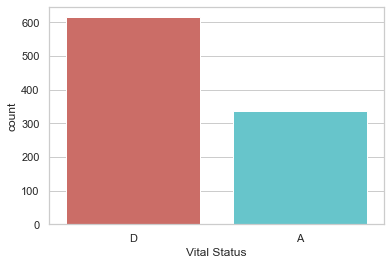

<Figure size 432x288 with 0 Axes>

In [136]:
sns.countplot(x='Vital Status',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')


In [137]:
aliveCount = len(data[data['Vital Status'] == "A"])
deadCount = len(data[data['Vital Status'] == "D"])
percentAlive = aliveCount/(aliveCount+deadCount)
percentDead = deadCount/(aliveCount+deadCount)

print("Percentage of Alive: ", percentAlive*100,"%")
print("Percentage of Dead:  " , percentDead*100,"%")


Percentage of Alive:  35.26315789473684 %
Percentage of Dead:   64.73684210526316 %


In [138]:
data['Vital Status'] = data['Vital Status'].replace("A",1);
data['Vital Status'] = data['Vital Status'].replace("D",0);
data['Vital Status']

0      0
1      0
2      0
3      0
4      0
      ..
945    0
946    0
947    0
948    0
949    0
Name: Vital Status, Length: 950, dtype: int64

In [139]:
data = data.rename(columns={"Vital Status":"Alive"})

In [140]:
data["Height"]

0      1.70
1      1.70
2      1.48
3      1.48
4      1.48
       ... 
945    1.72
946    1.72
947    1.72
948    1.72
949    1.72
Name: Height, Length: 950, dtype: float64

In [141]:
cat_vars = data.columns.tolist()
cat_vars.remove("Site")
cat_vars.remove("Alive")
cat_vars.remove("Height")
cat_vars.remove("Weight")
cat_vars.remove("Morph")
cat_vars.remove("Age")
cat_vars.remove("Cycle")
cat_vars.remove("Dose Administration")
cat_vars

['Behaviour',
 'T Best',
 'N Best',
 'M Best',
 'Grade',
 'Sex',
 'Cancer Plan',
 'CNS',
 'ACE',
 'Regimen',
 'Clinical Trial',
 'Chemo Radiation',
 'Regimen Time Delay',
 'Regimen Stopped Early',
 'Outcome',
 'Administration Route',
 'Drug Group']

In [142]:
num_vars = ["Site","Alive","Height","Weight","Morph","Age","Cycle","Dose Administration"]

In [143]:
data_final = data.copy()
dete = pd.get_dummies(data_final)
dete

,Morph,N Best,Age,ACE,Alive,Height,Weight,Outcome,Cycle,Dose Administration,...,Drug Group_NOT MATCHED,Drug Group_OXALIPLATIN,Drug Group_PACLITAXEL,Drug Group_PEMBROLIZUMAB,Drug Group_PEMETREXED,Drug Group_STEROID,Drug Group_TOPOTECAN,Drug Group_TRIAL,Drug Group_VINCRISTINE,Drug Group_VINORELBINE
0,8140.0,2.0,59,0,0,1.70,76.3,0.0,1,200.0,...,0,0,0,0,0,0,0,0,0,0
1,8140.0,2.0,59,0,0,1.70,76.3,0.0,1,10.0,...,0,0,0,0,0,0,0,0,0,0
2,8140.0,0.0,54,9,0,1.48,52.3,0.0,1,130.0,...,0,0,0,0,0,0,0,0,0,0
3,8140.0,0.0,54,9,0,1.48,52.3,0.0,1,210.0,...,0,0,0,0,0,0,0,0,0,0
4,8140.0,0.0,54,9,0,1.48,52.3,0.0,2,10.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,9861.0,0.0,75,1,0,1.72,69.0,0.0,4,240.0,...,0,0,0,0,0,1,0,0,0,0
946,9861.0,0.0,75,1,0,1.72,69.0,0.0,4,8.0,...,0,0,0,0,0,1,0,0,0,0
947,9861.0,0.0,75,1,0,1.72,69.0,0.0,4,120.0,...,0,0,0,0,0,0,0,0,0,0
948,9861.0,0.0,75,1,0,1.72,69.0,0.0,3,950.0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
#X = X.drop(columns=["Site","Alive"], axis = 1)
for var in cat_vars:
    data_final = pd.concat((data_final,pd.get_dummies(data[var], prefix = var)),1)


Ytrain = data_final[["Alive"]]
Xtrain = data_final.drop(columns=["Site","Alive"])
for var in cat_vars:
    Xtrain = Xtrain.drop(columns=[var])


C:\Users\User\AppData\Local\Temp/ipykernel_27376/547321042.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_final = pd.concat((data_final,pd.get_dummies(data[var], prefix = var)),1)


In [145]:
Ytrain

,Alive
0,0
1,0
2,0
3,0
4,0
...,...
945,0
946,0
947,0
948,0


In [146]:
Xtrain

,Morph,Age,Height,Weight,Cycle,Dose Administration,Behaviour_MALIGNANT,T Best_0,T Best_1a,T Best_1b,...,Drug Group_NOT MATCHED,Drug Group_OXALIPLATIN,Drug Group_PACLITAXEL,Drug Group_PEMBROLIZUMAB,Drug Group_PEMETREXED,Drug Group_STEROID,Drug Group_TOPOTECAN,Drug Group_TRIAL,Drug Group_VINCRISTINE,Drug Group_VINORELBINE
0,8140.0,59,1.70,76.3,1,200.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8140.0,59,1.70,76.3,1,10.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8140.0,54,1.48,52.3,1,130.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8140.0,54,1.48,52.3,1,210.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8140.0,54,1.48,52.3,2,10.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,9861.0,75,1.72,69.0,4,240.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
946,9861.0,75,1.72,69.0,4,8.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
947,9861.0,75,1.72,69.0,4,120.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
948,9861.0,75,1.72,69.0,3,950.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.3, random_state = 30)

# Logistic Regression

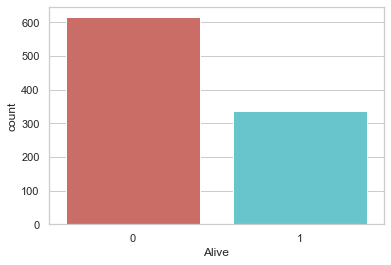

<Figure size 432x288 with 0 Axes>

In [148]:
#sampled_data = data_final.sample(n=50000)
sns.countplot(x='Alive',data=data_final, palette='hls')
plt.show()
plt.savefig('count_plot')


In [149]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 400))
pipe.fit(X_train,Y_train.values.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=400))])

In [150]:
pipe.score(X_test,Y_test)


0.9473684210526315

In [151]:
y_pred = pipe.predict(X_test)



In [152]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [153]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       193
           1       0.91      0.93      0.92        92

    accuracy                           0.95       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.95      0.95      0.95       285



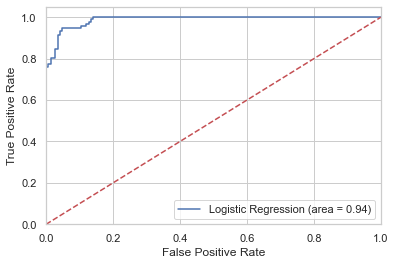

In [154]:

logit_roc_auc = roc_auc_score(Y_test, pipe.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, pipe.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# XGBoost


In [155]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [156]:
data_dmatrix = xgb.DMatrix(data=Xtrain, label=Ytrain)

In [157]:
xg_reg = xgb.XGBClassifier(objective = 'binary:logistic')

xg_reg.fit(X_train, Y_train)

y_pred = xg_reg.predict(X_test)

In [158]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       193
           1       0.97      0.97      0.97        92

    accuracy                           0.98       285
   macro avg       0.98      0.98      0.98       285
weighted avg       0.98      0.98      0.98       285



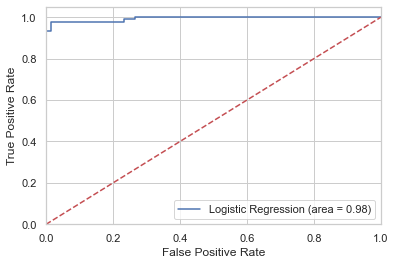

In [159]:
logit_roc_auc = roc_auc_score(Y_test, xg_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, xg_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Explainable Boosting Machine (EBM)


In [160]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

In [161]:
ebm = ExplainableBoostingClassifier(n_jobs = 8)
ebm.fit(X_train, Y_train)

#ebm_global = ebm.explain_global()
#show(emb_global)

#ebm_local = ebm.explain_local(X_test[:5], Y_test[:5])
#show(ebm_local)

ExplainableBoostingClassifier(n_jobs=8)

In [162]:
y_preds = ebm.predict(X_test)
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       193
           1       0.96      0.96      0.96        92

    accuracy                           0.97       285
   macro avg       0.97      0.97      0.97       285
weighted avg       0.97      0.97      0.97       285



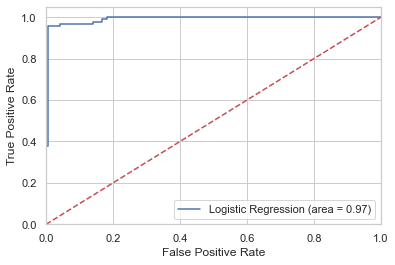

In [163]:
logit_roc_auc = roc_auc_score(Y_test, ebm.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, ebm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train.values.ravel())
y_pred=clf.predict(X_test)

In [168]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       193
           1       1.00      0.97      0.98        92

    accuracy                           0.99       285
   macro avg       0.99      0.98      0.99       285
weighted avg       0.99      0.99      0.99       285



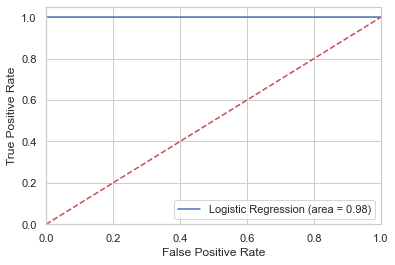

In [169]:
logit_roc_auc = roc_auc_score(Y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()